In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


In [4]:
# Import pandas library
import pandas as pd

# Define the file paths
mitbih_test_path = "/kaggle/input/heartbeat/mitbih_test.csv"
mitbih_train_path = "/kaggle/input/heartbeat/mitbih_train.csv"

# Read the csv files using pandas
test = pd.read_csv(mitbih_test_path, header=None)
train = pd.read_csv(mitbih_train_path, header=None)

# Print the info and head of each dataframe
print("MIT-BIH test info:")
test.info()
print("MIT-BIH test head:")
print(test.head())
print("MIT-BIH train info:")
train.info()
print("MIT-BIH train head:")
print(train.head())


MIT-BIH test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB
MIT-BIH test head:
        0         1         2         3         4         5         6    \
0  1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1  0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2  0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3  1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4  0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.004167  0.014583  0.054167  ...  0.0

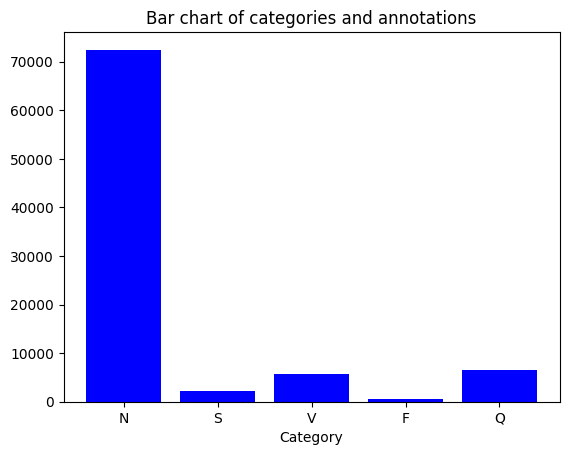

In [5]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Define the categories and annotations
categories = ["N", "S", "V", "F", "Q"]
counts = [train[187].value_counts()[0], train[187].value_counts()[1], train[187].value_counts()[2], train[187].value_counts()[3], train[187].value_counts()[4]]

# Plot the bar chart
plt.bar(categories, counts, color="blue")
plt.xlabel("Category")
plt.title("Bar chart of categories and annotations")

# Show the plot
plt.show()


In [6]:
df_1 = train[train[187] == 1]
df_2 = train[train[187] == 2]
df_3 = train[train[187] == 3]
df_4 = train[train[187] == 4]

In [24]:
from sklearn.utils import resample

df_1_upsample = resample(df_1, n_samples = 70000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 70000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 70000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 70000, replace = True, random_state = 123)
df_0 = train[train[187]==0].sample(n =70000, random_state=123)
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

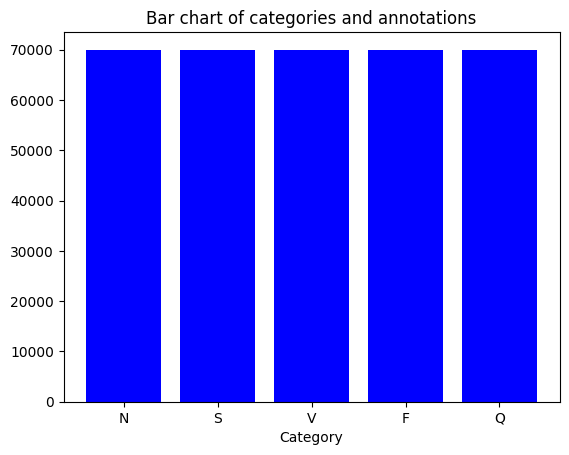

In [25]:
counts = [train_df[187].value_counts()[0], train_df[187].value_counts()[1], train_df[187].value_counts()[2], train_df[187].value_counts()[3], train_df[187].value_counts()[4]]

# Plot the bar chart
plt.bar(categories, counts, color="blue")
plt.xlabel("Category")
plt.title("Bar chart of categories and annotations")

# Show the plot
plt.show()

In [26]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
14967,1.000000,0.647702,0.039387,0.004376,0.102845,0.063457,0.067834,0.048140,0.045952,0.045952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71482,1.000000,0.946619,0.651246,0.330961,0.000000,0.067616,0.092527,0.163701,0.192171,0.177936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23543,1.000000,0.855967,0.302469,0.041152,0.185185,0.160494,0.098765,0.092593,0.109053,0.088477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9174,1.000000,0.838806,0.738806,0.641791,0.604478,0.583582,0.580597,0.580597,0.591045,0.577612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42319,1.000000,0.720257,0.019293,0.106109,0.073955,0.086817,0.070740,0.077170,0.070740,0.083601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85903,0.740800,0.638400,0.531200,0.412800,0.289600,0.168000,0.088000,0.019200,0.000000,0.024000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
82638,0.992248,0.488372,0.534884,0.562016,0.577519,0.554264,0.558140,0.515504,0.406977,0.279070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
81199,0.940503,0.882151,0.812357,0.747140,0.652174,0.538902,0.419908,0.295195,0.194508,0.155606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
83699,0.968495,0.924154,0.863477,0.816803,0.739790,0.649942,0.539090,0.431739,0.319720,0.252042,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [27]:
# Import sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the features and labels for the original data
X_train = train_df.drop(187,axis=1)
y_train = train_df[187] # The last column is the label

X_test = test.drop(187,axis=1)
y_test = test[187]
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the classifier on the train set
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9397040014617212
Classification report:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97     18118
         1.0       0.59      0.75      0.66       556
         2.0       0.93      0.89      0.91      1448
         3.0       0.20      0.85      0.33       162
         4.0       0.95      0.95      0.95      1608

    accuracy                           0.94     21892
   macro avg       0.73      0.88      0.76     21892
weighted avg       0.96      0.94      0.95     21892



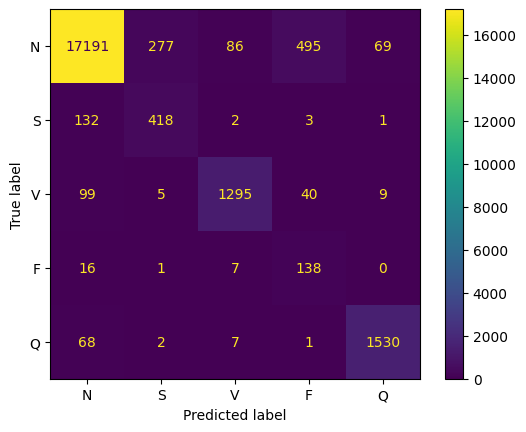

In [28]:
# Import ConfusionMatrixDisplay from sklearn.metrics
from sklearn.metrics import ConfusionMatrixDisplay

# Create a list of labels
labels = ["N", "S", "V", "F", "Q"]

# Create a ConfusionMatrixDisplay object from the true and predicted labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=labels)

# Plot the confusion matrix using the plot method
cm_display.plot()
